In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/HP/Documents/DataTrained/Intern Assignments/Questions/Micro-Credit-Project--1-/Micro Credit Project/Data file.csv')
data.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.isna().sum().sum()

0

In [4]:
#dropping unrelevant columns

data = data.drop(columns = ['Unnamed: 0','pcircle','pdate','msisdn'])

In [5]:
data.shape

(209593, 33)

In [6]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
data = abs(data)# converting all negative to positive values since -ve value does not make sense.
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.808718,5381.431293,6082.544140,2715.376558,3509.497148,3756.125844,3712.204801,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.032666,9220.606472,10918.796572,4294.257439,5754.630600,53905.872857,53374.833299,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.453000,42.693333,299.700000,330.000000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1095.750000,1347.220000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3362.350000,4204.510000,7.000000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


### Visualization plots.

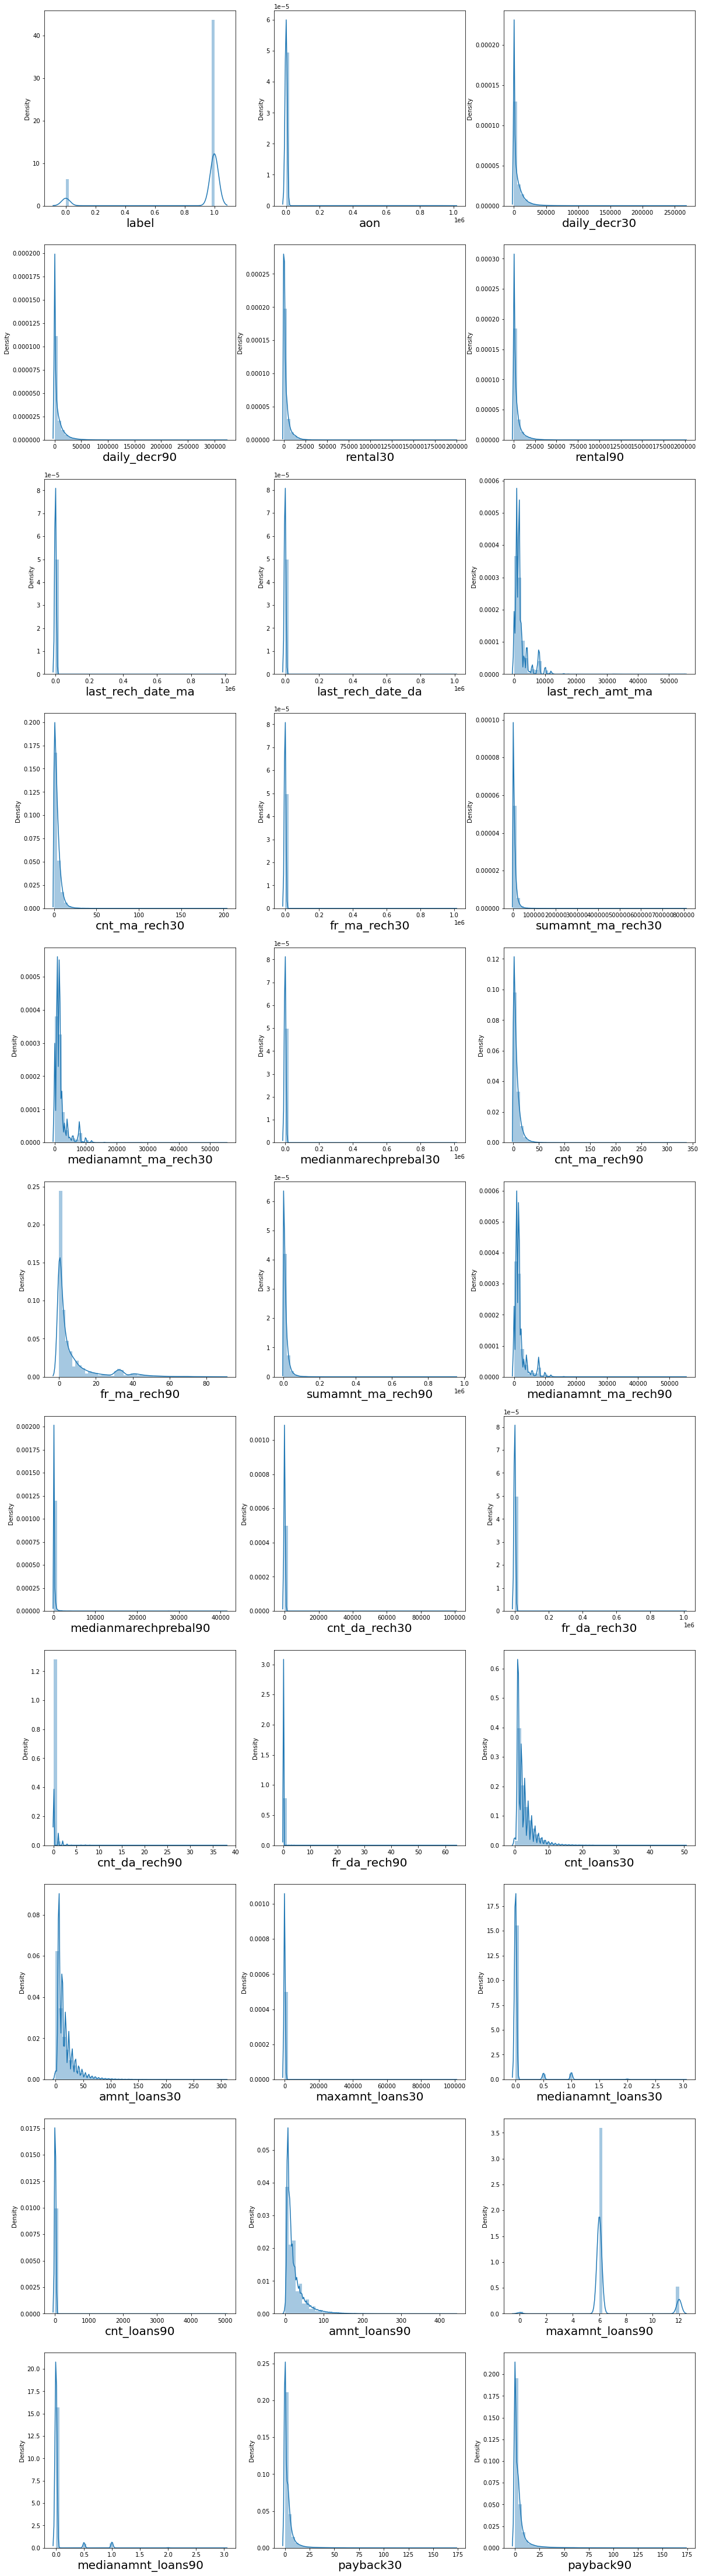

In [8]:
plt.figure(figsize = (20,80))
plotnumber = 1

for column in data :
    if plotnumber <=33:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber +=1
plt.show()

In [9]:
data.skew()

label                   -2.270254
aon                     10.392951
daily_decr30             3.946246
daily_decr90             4.252578
rental30                 4.560510
rental90                 4.467282
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779883
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.086298
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [12]:
x = data.drop('label',axis = 1)
y = data.label

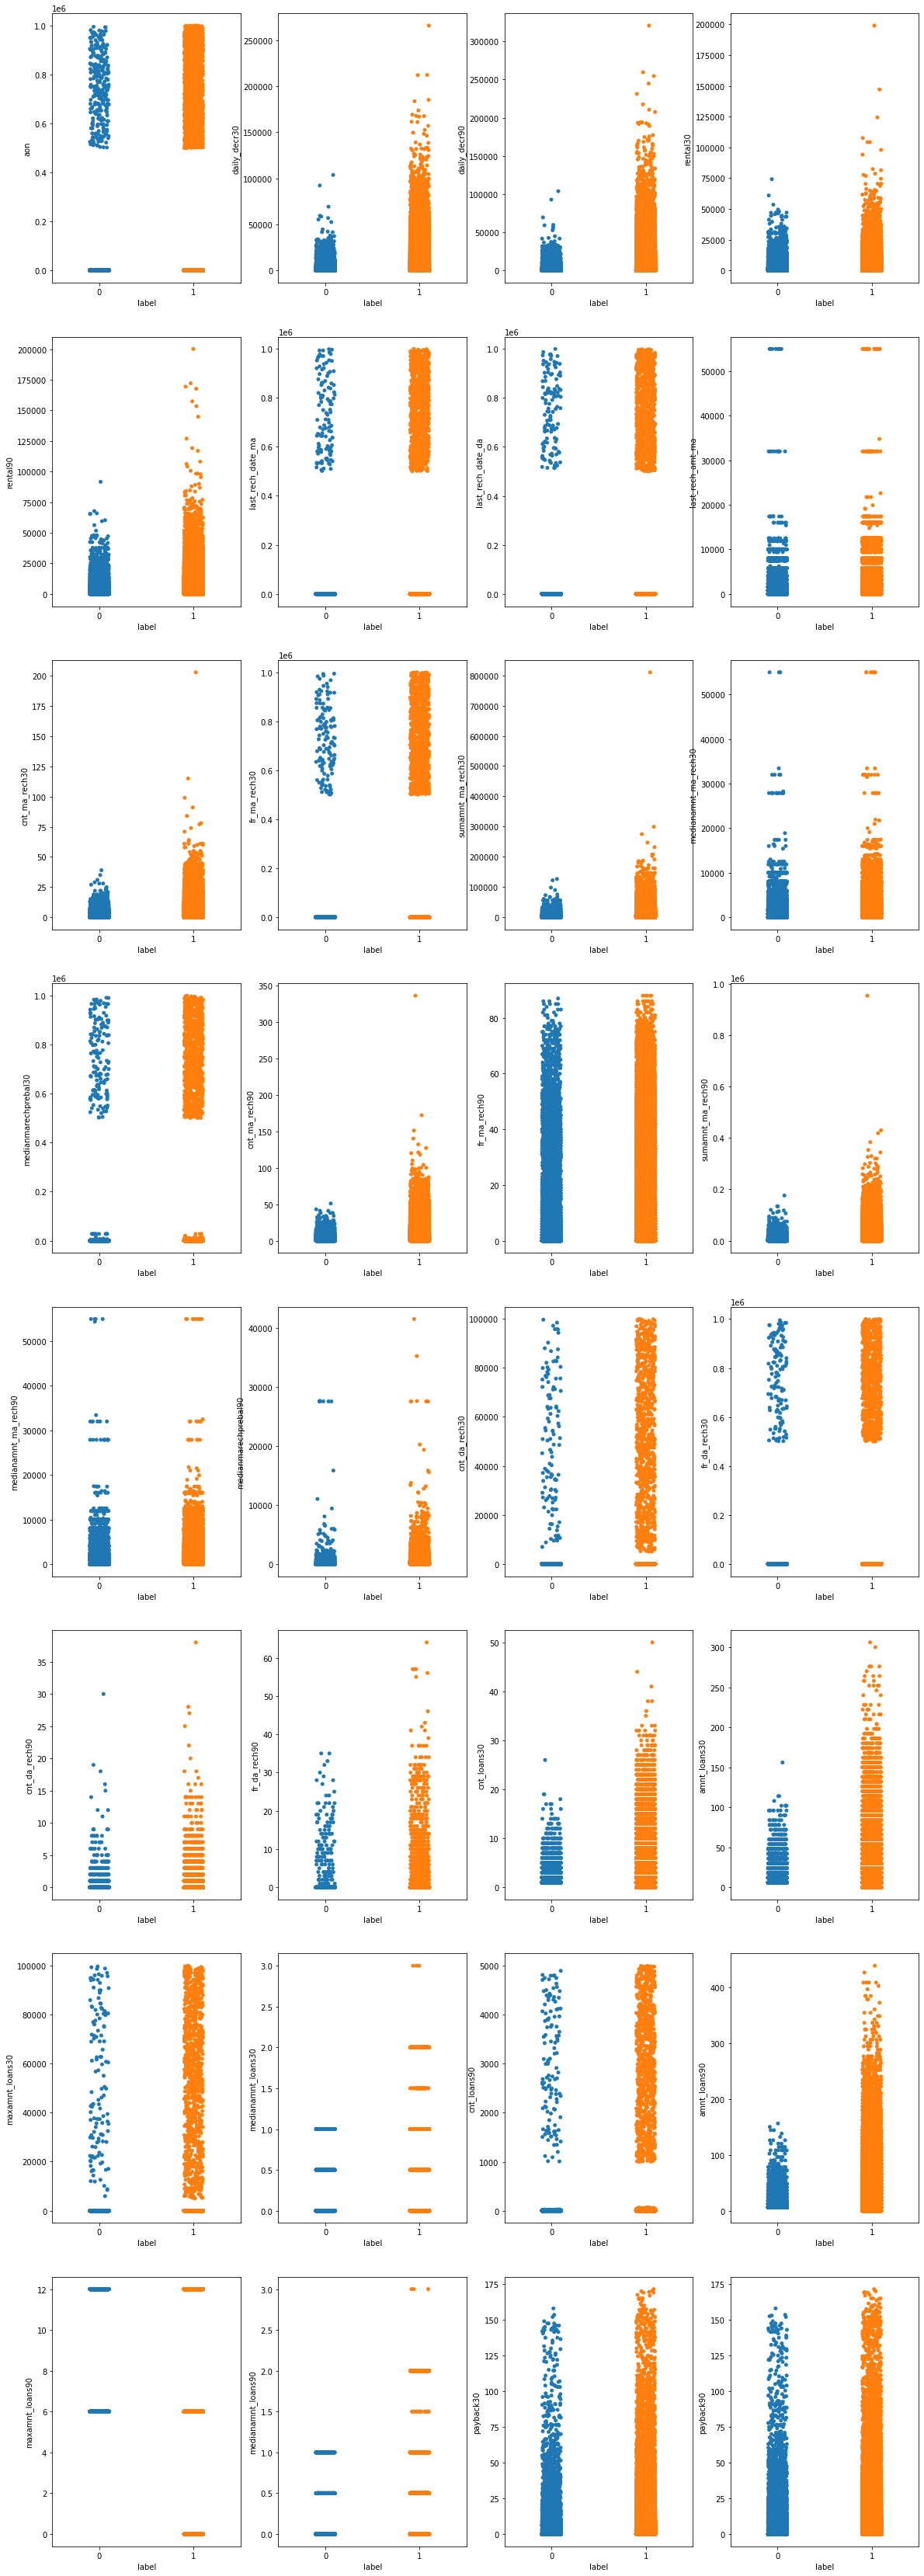

In [13]:
plt.figure(figsize = (20,60))
plotnumber = 1

for column in x:
    if plotnumber <=32 :
        ax = plt.subplot(8,4,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber +=1
plt.show()

In [24]:
features = list(data.columns.drop('label'))

In [26]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method = 'yeo-johnson')

data[features] = scaler.fit_transform(data[features].values)
data[features].skew()

aon                     -0.298537
daily_decr30            -0.130636
daily_decr90            -0.120627
rental30                -0.040537
rental90                -0.041327
last_rech_date_ma        0.012083
last_rech_date_da        5.307319
last_rech_amt_ma        -0.061262
cnt_ma_rech30           -0.000145
fr_ma_rech30             0.165015
sumamnt_ma_rech30       -0.291322
medianamnt_ma_rech30    -0.189628
medianmarechprebal30    -0.027935
cnt_ma_rech90           -0.002465
fr_ma_rech90             0.142952
sumamnt_ma_rech90       -0.192158
medianamnt_ma_rech90    -0.044604
medianmarechprebal90     0.014084
cnt_da_rech30            6.925820
fr_da_rech30            11.390665
cnt_da_rech90            6.006577
fr_da_rech90            15.469700
cnt_loans30              0.036243
amnt_loans30             0.001948
maxamnt_loans30         -1.680107
medianamnt_loans30       3.447735
cnt_loans90              0.105580
amnt_loans90            -0.008988
maxamnt_loans90          0.364282
medianamnt_loa

### Let's see the heatmap to check multicollinearity

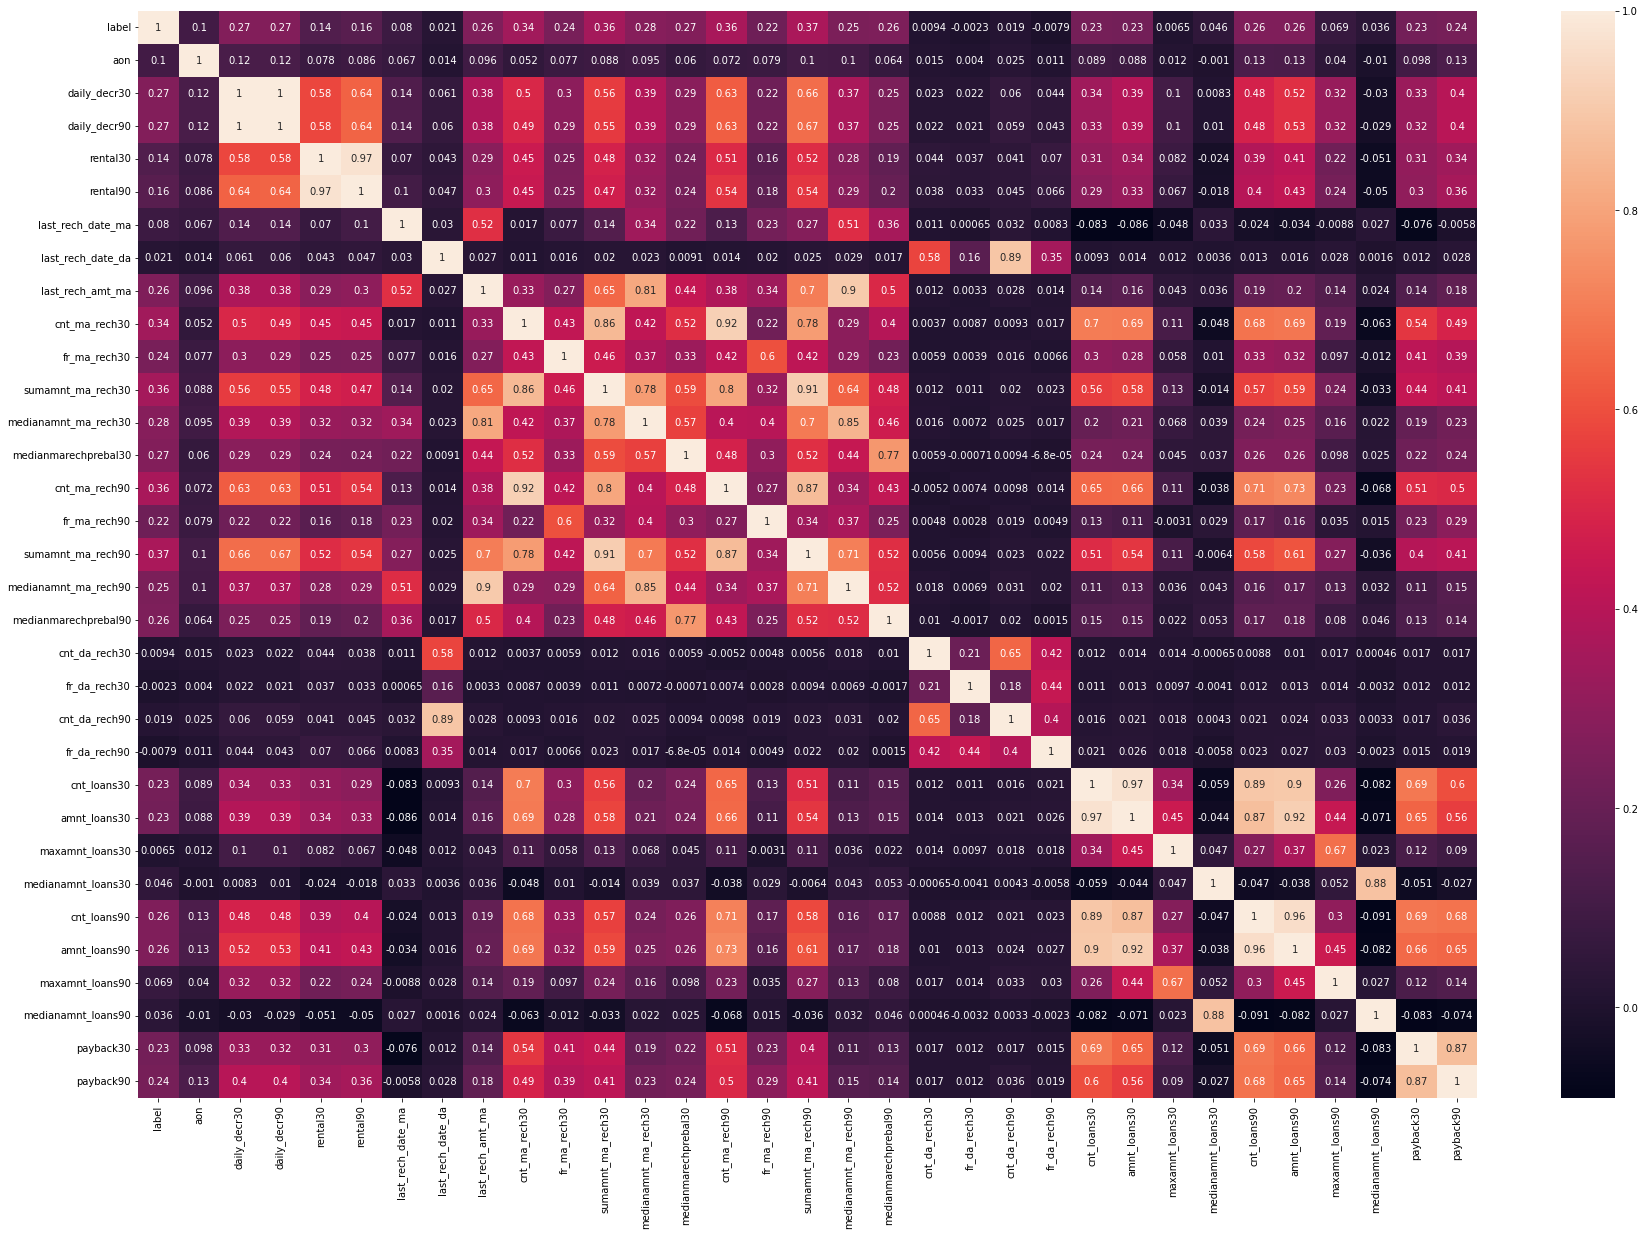

In [27]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [28]:
data = data.drop(columns = ['daily_decr30'],axis = 1)

In [29]:
data.shape

(209593, 32)

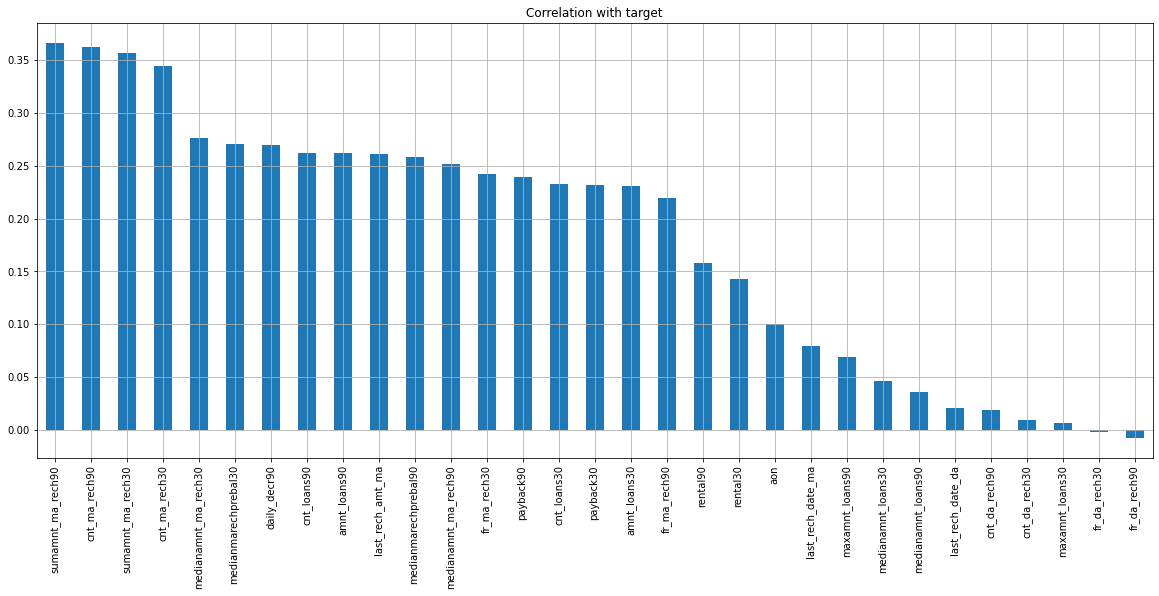

In [59]:
corr = data.drop('label', axis = 1).corrwith(data.label).sort_values(ascending=False)

corr.plot(kind = 'bar', grid = True, figsize = (20,8),
          title = "Correlation with target")
plt.show()

In [31]:
x = data.drop('label', axis = 1)
y = data.label

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()
bg = BaggingClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

## Decision Tree - 86.5% (random state 8)

In [56]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    dt.fit(x_train,y_train)
    y_train_pred = dt.predict(x_train)
    y_test_pred = dt.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9996564754379939
At random state 0, the testing accuracy is : 0.8636615202580202

At random state 1, the training accuracy is : 0.9996628370039569
At random state 1, the testing accuracy is : 0.8612568942155384

At random state 2, the training accuracy is : 0.99966919856992
At random state 2, the testing accuracy is : 0.8613332315502205

At random state 3, the training accuracy is : 0.9996882832678092
At random state 3, the testing accuracy is : 0.8626882192408252

At random state 4, the training accuracy is : 0.9996055829102892
At random state 4, the testing accuracy is : 0.8648638332792611

At random state 5, the training accuracy is : 0.9996501138720307
At random state 5, the testing accuracy is : 0.8622683639000744

At random state 6, the training accuracy is : 0.9996119444762522
At random state 6, the testing accuracy is : 0.8645966526078742

At random state 7, the training accuracy is : 0.9996628370039569
At random state 7, the test

## K Nearest Neighbor - 89.96% (random state = 4)

In [57]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    kn.fit(x_train,y_train)
    y_train_pred = kn.predict(x_train)
    y_test_pred = kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9212819827728794
At random state 0, the testing accuracy is : 0.8988530315464035

At random state 1, the training accuracy is : 0.9208366731554639
At random state 1, the testing accuracy is : 0.898986621882097

At random state 2, the training accuracy is : 0.9213901293942517
At random state 2, the testing accuracy is : 0.8979560678638905

At random state 3, the training accuracy is : 0.9205822105169409
At random state 3, the testing accuracy is : 0.8995209832248707

At random state 4, the training accuracy is : 0.9211611130195809
At random state 4, the testing accuracy is : 0.8996545735605641

At random state 5, the training accuracy is : 0.9209448197768363
At random state 5, the testing accuracy is : 0.8973453691864348

At random state 6, the training accuracy is : 0.9205631258190516
At random state 6, the testing accuracy is : 0.8995209832248707

At random state 7, the training accuracy is : 0.9221598788757841
At random state 7, the tes

## Bagging Classifier - 90.36% (random state = 9)

In [37]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    bg.fit(x_train,y_train)
    y_train_pred = bg.predict(x_train)
    y_test_pred = bg.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9945163301398272
At random state 0, the testing accuracy is : 0.901906524933682

At random state 1, the training accuracy is : 0.9942427828034149
At random state 1, the testing accuracy is : 0.9034523559609916

At random state 2, the training accuracy is : 0.994408183518455
At random state 2, the testing accuracy is : 0.9035859462966851

At random state 3, the training accuracy is : 0.9937084112625164
At random state 3, the testing accuracy is : 0.9030325006202409

At random state 4, the training accuracy is : 0.9942236981055257
At random state 4, the testing accuracy is : 0.9022882116070917

At random state 5, the training accuracy is : 0.9943572909907503
At random state 5, the testing accuracy is : 0.9009904769174985

At random state 6, the training accuracy is : 0.994408183518455
At random state 6, the testing accuracy is : 0.9025744766121491

At random state 7, the training accuracy is : 0.9943509294247872
At random state 7, the testi

## Random Forest - 91.24% (random state = 4)

In [58]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    rf.fit(x_train,y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9996437523060676
At random state 0, the testing accuracy is : 0.9114868604362679

At random state 1, the training accuracy is : 0.9996501138720307
At random state 1, the testing accuracy is : 0.9113723544342449

At random state 2, the training accuracy is : 0.9996628370039569
At random state 2, the testing accuracy is : 0.9098456077406057

At random state 3, the training accuracy is : 0.9996755601358831
At random state 3, the testing accuracy is : 0.9117922097749958

At random state 4, the training accuracy is : 0.9995992213443261
At random state 4, the testing accuracy is : 0.912040306112712

At random state 5, the training accuracy is : 0.9996437523060676
At random state 5, the testing accuracy is : 0.9109143304261532

At random state 6, the training accuracy is : 0.9996055829102892
At random state 6, the testing accuracy is : 0.9116586194393023

At random state 7, the training accuracy is : 0.9996501138720307
At random state 7, the tes

## Gradient boosting - 91.0% (random state = 1)

In [60]:
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = i)
    gb.fit(x_train,y_train)
    y_train_pred = gb.predict(x_train)
    y_test_pred = gb.predict(x_test)
    print(f"At random state {i}, the training accuracy is : {accuracy_score(y_train,y_train_pred)}")
    print(f"At random state {i}, the testing accuracy is : {accuracy_score(y_test,y_test_pred)}\n")

At random state 0, the training accuracy is : 0.9097611868137461
At random state 0, the testing accuracy is : 0.9087578007213878

At random state 1, the training accuracy is : 0.9091759227451429
At random state 1, the testing accuracy is : 0.9100937040783221

At random state 2, the training accuracy is : 0.9097739099456722
At random state 2, the testing accuracy is : 0.9070592950247142

At random state 3, the training accuracy is : 0.9092268152728475
At random state 3, the testing accuracy is : 0.9090058970591042

At random state 4, the training accuracy is : 0.9092840693665153
At random state 4, the testing accuracy is : 0.9087578007213878

At random state 5, the training accuracy is : 0.9101937732992353
At random state 5, the testing accuracy is : 0.9081852707112731

At random state 6, the training accuracy is : 0.9095512551369646
At random state 6, the testing accuracy is : 0.9090631500601156

At random state 7, the training accuracy is : 0.9105563825591307
At random state 7, the te

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state = 4)
rf.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_test_pred = rf.predict(x_test)
print(f"The accuracy score is {accuracy_score(y_test,y_test_pred)*100:.2f} %")

The accuracy score is 91.21 %


## Cross Validation

In [63]:
test_acc = accuracy_score(y_test,y_test_pred)

for i in range (2,10):
    cv_score = cross_val_score(rf,x_scaled,y,cv = i)
    cv_mean  = cv_score.mean()
    print(f"At cv = {i},cv_score = {cv_mean*100:.4f} and accuracy for testing = {test_acc*100:.4f}\n")

At cv = 2,cv_score = 91.1137 and accuracy for testing = 91.2136

At cv = 3,cv_score = 91.1452 and accuracy for testing = 91.2136

At cv = 4,cv_score = 91.1734 and accuracy for testing = 91.2136

At cv = 5,cv_score = 91.1605 and accuracy for testing = 91.2136

At cv = 6,cv_score = 91.1815 and accuracy for testing = 91.2136

At cv = 7,cv_score = 91.1667 and accuracy for testing = 91.2136

At cv = 8,cv_score = 91.1781 and accuracy for testing = 91.2136

At cv = 9,cv_score = 91.1610 and accuracy for testing = 91.2136



In [64]:
cv_score = cross_val_score(rf,x_scaled,y,cv = 6)
cv_mean = cv_score.mean()
cv_mean

0.9117718641022615

### Checking confusion matrix

In [66]:
y_pred = rf.predict(x_test)

In [67]:
cfm = confusion_matrix(y_test, y_pred)
cfm

array([[ 2862,  3754],
       [  850, 44933]], dtype=int64)

### Classification report

In [68]:
print(classification_report(y_test, y_pred, digits = 2))

              precision    recall  f1-score   support

           0       0.77      0.43      0.55      6616
           1       0.92      0.98      0.95     45783

    accuracy                           0.91     52399
   macro avg       0.85      0.71      0.75     52399
weighted avg       0.90      0.91      0.90     52399



In [69]:
# ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

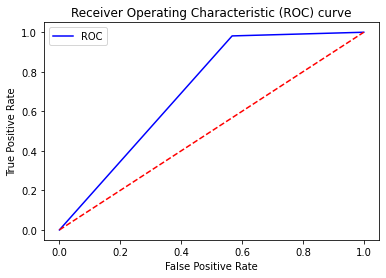

In [70]:
plt.plot(fpr, tpr, color = 'blue', label = 'ROC')
plt.plot([0,1], [0,1], color = 'red', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

In [71]:
# Area Under the Curve (AUC)

auc_score = roc_auc_score(y_test, y_pred)
auc_score

0.7070109115233444

## Saving the model

In [72]:
import pickle
filename = 'Micro_Credit_Loan_Use_Case.pkl'
pickle.dump(rf,open(filename,'wb'))